# Importando


In [31]:
import matplotlib.pyplot as plt
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode(path_drive, path_local, ncolunas=None):
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(path_drive)
    except:
        if ncolunas is None: df = pd.read_csv(path_local)
        else: df = pd.read_csv(path_local,  nrows=ncolunas)
    return df


In [32]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/dados_tratados.csv'
local = './data/dados_tratados.csv'

df = ColabOuCode(
    drive,
    local,
    ncolunas=50000
)

df.shape    

(50000, 8)

# Classificações

In [33]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.combine import SMOTEENN

## Separando e balanceando os dados

In [34]:
from sklearn.model_selection import train_test_split

x_df = df.drop('isFraud',axis=1)
y_df = df[['isFraud']]

X_treino, X_teste, y_treino, y_teste = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

In [35]:
sennComb = SMOTEENN(
    sampling_strategy=0.5,
    random_state=42,
    n_jobs=-1
)

X_comb, y_comb = sennComb.fit_resample(X_treino, y_treino)


<AxesSubplot:xlabel='isFraud', ylabel='count'>

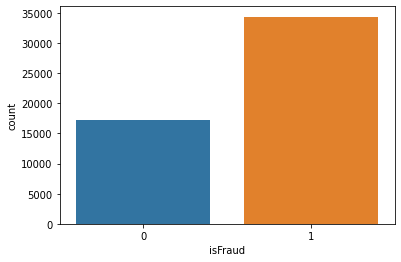

In [36]:
sns.countplot(y_comb['isFraud'])

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

arvoreDecisao = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=500
)
arvoreDecisao.fit(X_comb, y_comb)

y_arvPred = arvoreDecisao.predict(X_teste)

confusion_matrix(y_teste, y_arvPred)


array([[   26,     6],
       [  176, 14792]])

In [38]:
print(classification_report(y_teste, y_arvPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.13      0.81      0.22        32
  Nao Fraude       1.00      0.99      0.99     14968

    accuracy                           0.99     15000
   macro avg       0.56      0.90      0.61     15000
weighted avg       1.00      0.99      0.99     15000



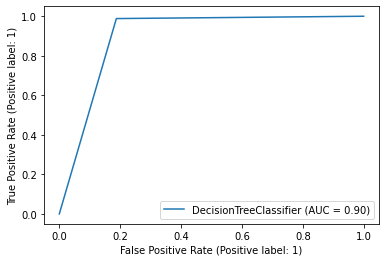

In [39]:
plot_roc_curve(arvoreDecisao, X_teste, y_teste,)
plt.show()

## Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
)

randForest.fit(X_comb, y_comb)

y_arvRandPred = randForest.predict(X_teste)

confusion_matrix(y_teste, y_arvPred)


array([[   26,     6],
       [  176, 14792]])

In [41]:
print(classification_report(y_teste, y_arvRandPred, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.08      0.81      0.14        32
  Nao Fraude       1.00      0.98      0.99     14968

    accuracy                           0.98     15000
   macro avg       0.54      0.90      0.56     15000
weighted avg       1.00      0.98      0.99     15000



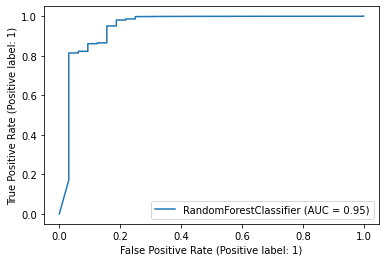

In [42]:
plot_roc_curve(randForest, X_teste, y_teste,)
plt.show()

## XGBoost

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=10,
    max_depth=6,
    subsample=0.75,
    #gpu_id='0',
    #tree_method='gpu_hist'

)

xgb.fit(X_comb, y_comb) 
y_xgb = xgb.predict(X_teste)

confusion_matrix(y_teste, y_xgb)

[21:43:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[   26,     6],
       [  458, 14510]])

In [48]:
print(classification_report(y_teste, y_xgb, target_names=['Fraude', 'Nao Fraude']))


              precision    recall  f1-score   support

      Fraude       0.05      0.81      0.10        32
  Nao Fraude       1.00      0.97      0.98     14968

    accuracy                           0.97     15000
   macro avg       0.53      0.89      0.54     15000
weighted avg       1.00      0.97      0.98     15000



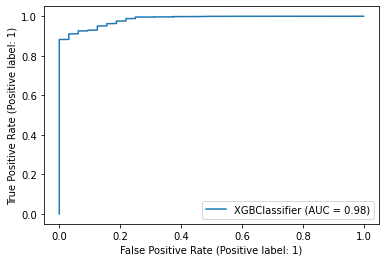

In [49]:
plot_roc_curve(xgb, X_teste, y_teste,)
plt.show()